In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from transformers import DistilBertTokenizer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('malicious_phish.csv')
print(df.head())


                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement


In [ ]:
# @title
print(df.columns)
print(df.tail)

Index(['url', 'type'], dtype='object')
<bound method NDFrame.tail of                                                       url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]>


In [ ]:
 # Rename the columns
df.columns = ['URL', 'Label']

# Check the first few rows again
c

# Check the value counts of the 'Label' column
print(df['Label'].value_counts())



                                                 URL       Label
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement
Label
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64


In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Display basic information about the DataFrame, including column names, data types, and non-null counts
print(df.info())

# Display descriptive statistics for numerical columns (if any)
print(df.describe())

# Display the count of each unique value in the 'Label' column
print(df['Label'].value_counts())

                                                 URL       Label
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     651191 non-null  object
 1   Label   651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None
                                                      URL   Label
count                                              651191  651191
unique                                             641119       4
top     http://style.org.hc360.com/css/detail/mysite/s...  benign
freq                                       

In [ ]:
# Drop rows with missing values in the 'Label' column
df.dropna(subset=['Label'], inplace=True)

# Verify that the missing value has been handled
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     651191 non-null  object
 1   Label   651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None


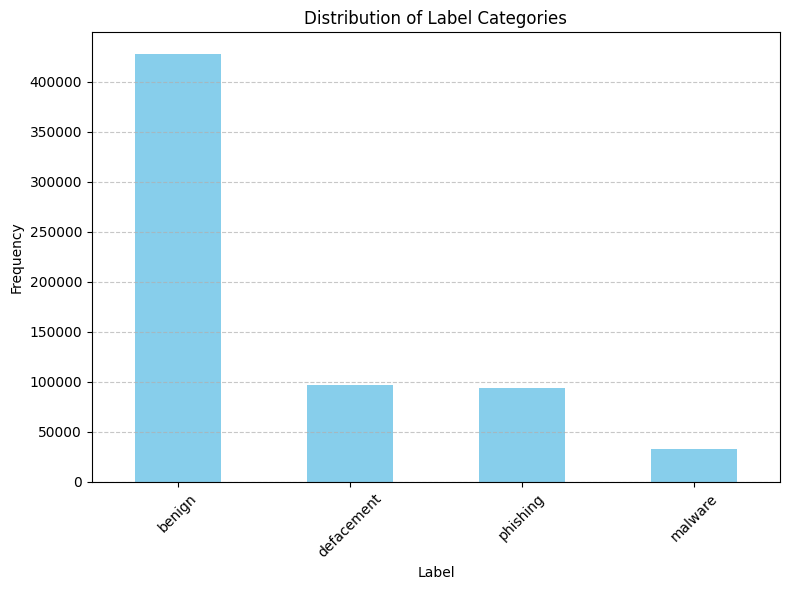

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each label category
label_counts = df['Label'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Label Categories')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Rename 'benig' label to 'benign'
df['Label'] = df['Label'].replace('benig', 'benign')

# Verify that the label has been renamed
print(df['Label'].value_counts())


Label
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64


In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch


In [ ]:
# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Reduce the dataset size
df = df.sample(n=7000, random_state=1)

# Split the dataset into training, validation, and test sets
train_texts, val_texts, train_labels, val_labels = train_test_split(df['URL'].tolist(), df['Label'].tolist(), test_size=0.2, random_state=1)
train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=1)

# Convert labels to numerical values
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)
test_labels = label_encoder.transform(test_labels)

# Tokenize the datasets
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
class URLDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
from transformers import DistilBertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

# Load the model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)

# Create datasets and data loaders for training, validation, and testing
train_dataset = URLDataset(train_encodings, train_labels)
val_dataset = URLDataset(val_encodings, val_labels)
test_dataset = URLDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=3, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=3, shuffle=False)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Validation loop
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for batch in val_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            val_loss += loss.item()

    epoch_loss /= len(train_loader)
    val_loss /= len(val_loader)

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}')

print('Training completed!')


# Save the trained model to disk
torch.save(model.state_dict(), 'distilbert_model.pth')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/3: 100%|██████████| 1680/1680 [3:03:06<00:00,  6.54s/it]


Epoch 1/3, Training Loss: 0.3583, Validation Loss: 0.2486


Epoch 2/3: 100%|██████████| 1680/1680 [3:03:00<00:00,  6.54s/it]


Epoch 2/3, Training Loss: 0.1856, Validation Loss: 0.2004


Epoch 3/3: 100%|██████████| 1680/1680 [3:01:36<00:00,  6.49s/it]


Epoch 3/3, Training Loss: 0.1139, Validation Loss: 0.2324
Training completed!


In [ ]:
# Testing loop
model.eval()
with torch.no_grad():
    test_loss = 0.0
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        test_loss += loss.item()

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.2367


In [ ]:
print(max(train_labels))



3


vh

In [ ]:
print(model.config.num_labels)

4


In [ ]:
import collections

label_counts = collections.Counter(train_labels)
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")


Label: 0, Count: 3316
Label: 1, Count: 731
Label: 3, Count: 716
Label: 2, Count: 277
